# Q-Learning
> Off-Policy Temporal Difference Learning.


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

In [2]:
env_name = "Taxi-v3"
epsilon = 1
decay_rate = 0.001
min_epsilon = 0.01
max_episodes = 2500
print_interval = 100
test_episodes = 3
lr = 0.4
gamma = 0.99

In [3]:
env = gym.make(env_name)
env = gym.wrappers.Monitor(env, "./vid", force=True)
n_states = env.observation_space.n
n_actions = env.action_space.n
print(f"Number of states: {n_states}\n"
      f"Number of actions: {n_actions}")

Number of states: 500
Number of actions: 6


In [4]:
q_table = np.zeros((n_states, n_actions))

In [5]:
def choose_action(state):
    global q_table
    if epsilon > np.random.uniform():
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table[state, :])
    return action

In [6]:
def update_table(state, action, reward, done, next_state):
    global q_table
    q_table[state, action] += lr * (reward + gamma * np.max(q_table[next_state, :]) * (1 - done) - q_table[state, action])

## Pseudocode
> <p align="center">
  <img src="q_learning_psuedo.png">
  </p> 

In [7]:
running_reward = []
for episode in range(1, 1 + max_episodes):
    state = env.reset()
    done = False  
    episode_reward = 0
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        update_table(state, action, reward, done, next_state)
        
        episode_reward += reward
        if done:
            break
        state = next_state
            
    epsilon  = epsilon - decay_rate if epsilon - decay_rate > min_epsilon else min_epsilon
    
    if episode == 1:
        running_reward.append(episode_reward)
    else:
        running_reward.append(0.99 * running_reward[-1] + 0.01 * episode_reward)
    if episode % print_interval == 0:
        print(f"Ep:{episode}| "
              f"Ep_reward:{episode_reward}| "
              f"Running_reward:{running_reward[-1]:.3f}| "
             f"Epsilon:{epsilon:.3f}| ")

Ep:100| Ep_reward:-641| Running_reward:-775.473| Epsilon:0.900| 
Ep:200| Ep_reward:-528| Running_reward:-683.087| Epsilon:0.800| 
Ep:300| Ep_reward:-193| Running_reward:-449.210| Epsilon:0.700| 
Ep:400| Ep_reward:-210| Running_reward:-258.769| Epsilon:0.600| 
Ep:500| Ep_reward:-21| Running_reward:-136.564| Epsilon:0.500| 
Ep:600| Ep_reward:-61| Running_reward:-77.223| Epsilon:0.400| 
Ep:700| Ep_reward:0| Running_reward:-42.093| Epsilon:0.300| 
Ep:800| Ep_reward:-13| Running_reward:-22.446| Epsilon:0.200| 
Ep:900| Ep_reward:-16| Running_reward:-8.791| Epsilon:0.100| 
Ep:1000| Ep_reward:4| Running_reward:0.143| Epsilon:0.010| 
Ep:1100| Ep_reward:6| Running_reward:4.621| Epsilon:0.010| 
Ep:1200| Ep_reward:-6| Running_reward:6.137| Epsilon:0.010| 
Ep:1300| Ep_reward:5| Running_reward:6.853| Epsilon:0.010| 
Ep:1400| Ep_reward:8| Running_reward:6.789| Epsilon:0.010| 
Ep:1500| Ep_reward:10| Running_reward:7.398| Epsilon:0.010| 
Ep:1600| Ep_reward:10| Running_reward:7.514| Epsilon:0.010| 
Ep:1

Text(0.5, 1.0, 'Running_reward')

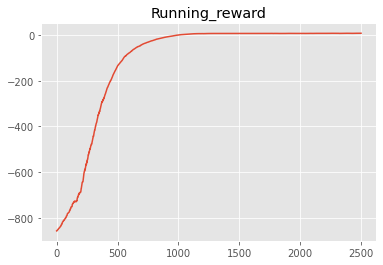

In [8]:
plt.figure()
plt.style.use("ggplot")
plt.plot(np.arange(max_episodes), running_reward)
plt.title("Running_reward")

In [9]:
for episode in range(1, 1 + test_episodes):
    state = env.reset()
    done = False  
    episode_reward = 0
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        env.render()
        clear_output(wait=True)
        sleep(0.2)
        episode_reward += reward
        if done:
            break
        state = next_state

    print(f"Ep:{episode}| "
          f"Ep_reward:{episode_reward}| ")
    env.close()

Ep:3| Ep_reward:4| 


## Demo
<p align="center">
  <img src="q_learning.gif" width=150>
</p> 